In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [29]:
df = pd.read_csv('/content/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [30]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


<Axes: >

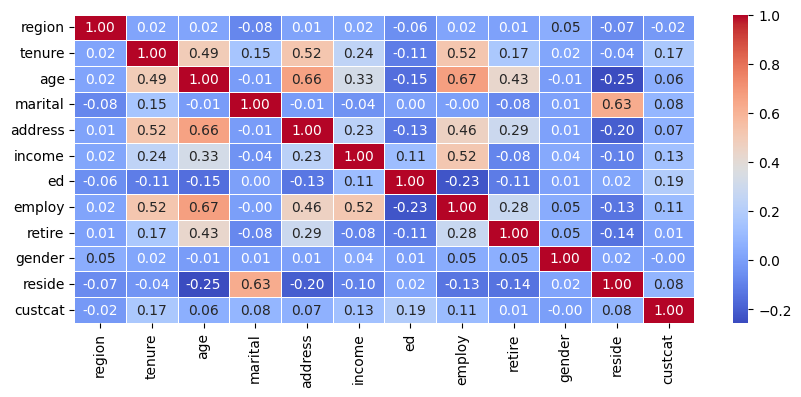

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [49]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


In [50]:
X = df.drop('custcat',axis=1)
y = df['custcat']

In [51]:
X_norm = StandardScaler().fit_transform(X)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=4)

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['custcat'])


In [54]:
k=4

In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)
yhat = knn_model.predict(X_test)

In [56]:
print("test set accuracy", accuracy_score(y_test,yhat))

test set accuracy 0.32


In [57]:
# Step 1: Recreate the scaler (or better, keep the one used earlier)
scaler = StandardScaler().fit(X)
X_norm = scaler.transform(X)

# Step 2: Define new data as a 2D array (1 row, same feature order)
new_customer = np.array([[3, 12, 40, 1, 10, 60, 3, 6, 0, 1, 3]])

# Step 3: Scale new data
new_customer_scaled = scaler.transform(new_customer)

# Step 4: Predict
predicted_class = knn_model.predict(new_customer_scaled)

print("Predicted customer category:", predicted_class[0])


Predicted customer category: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


You can predict multiple customers at once by passing a 2D array:

In [58]:
new_data = np.array([
    [2, 10, 35, 1, 8, 45, 2, 4, 0, 0, 2],
    [3, 20, 55, 0, 15, 120, 5, 20, 0, 1, 5]
])
new_data_scaled = scaler.transform(new_data)
predictions = knn_model.predict(new_data_scaled)
print(predictions)


[3 2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
decoded_labels = encoder.inverse_transform(predictions)
print(decoded_labels)


[4 3]
